# Linear Regression Project
## Udemy course Python for machine learning and data science (José Portilla)

A company is trying to decide whether to focus their efforts on their mobile app experience or their website.
Where the company must be focus their efforts?

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data
Columns
* Email
* Address
* Avatar color
* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

Data is fake

In [4]:
df=pd.read_csv('Ecommerce_Customers')

**Info**

In [5]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

**Jointplot of 'Time on Website' Vs 'Yearly Amount Spent**

In [8]:
sns.set_style('whitegrid')  #plot's style

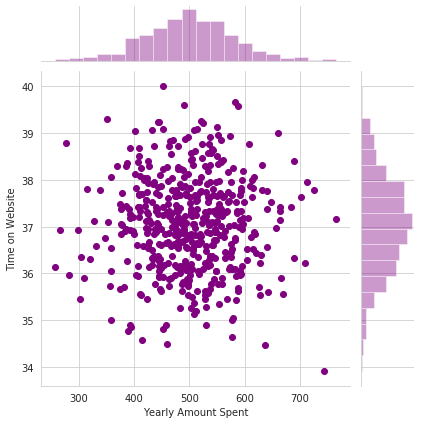

In [16]:
sns.jointplot(df['Yearly Amount Spent'],df['Time on Website'],color='purple')

Just with the plot we couldn't say that more time on website doesn't mean more spent money

*Let's see now in the app*

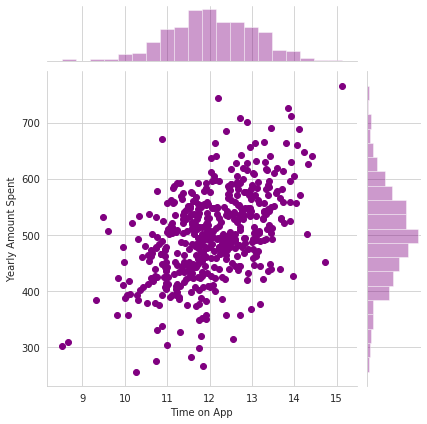

In [18]:
sns.jointplot(df['Time on App'],df['Yearly Amount Spent'],color='purple')

A linear relation between 'time on App' and 'Yearly Amount Spent' is more clear.

Let's see now how is the 'Time on App' according to 'Long of Membership' 

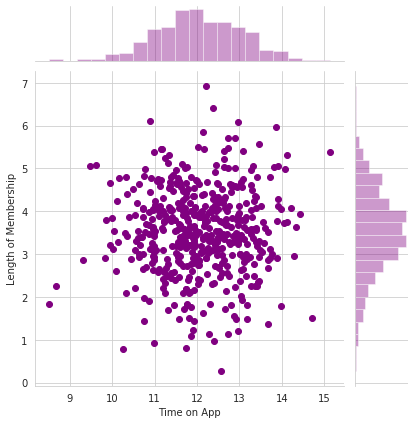

In [20]:
sns.jointplot(df['Time on App'],df['Length of Membership'],color='purple')

**Let's explore all relations across numeric columns of the DataSet**

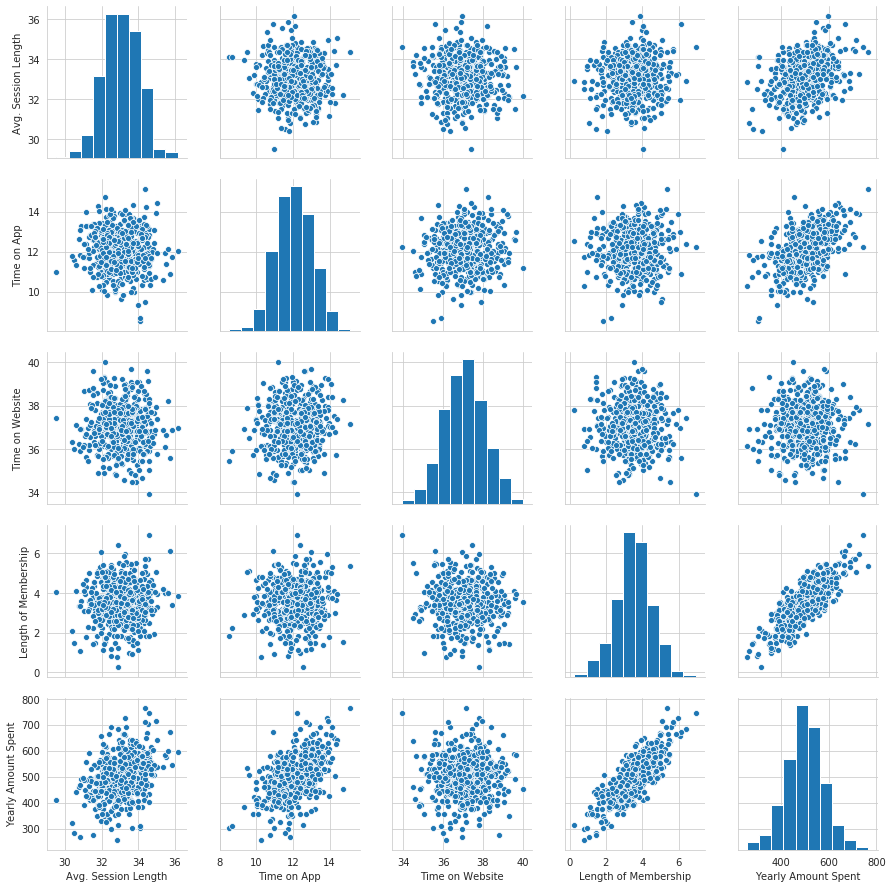

In [21]:
sns.pairplot(df)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

Answer: Length of Membership

A linear model plot of  Yearly Amount Spent vs. Length of Membership.

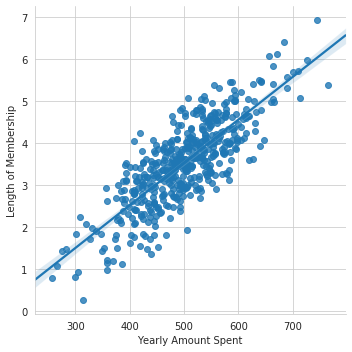

In [27]:
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=df)

## Linear Regression

Let's fit a linear model using sklearn

### Training and Testing Data

In [29]:
x=df[['Avg. Session Length','Time on App', 'Time on Website', 'Length of Membership']]  # numerical columns
y=df['Yearly Amount Spent']                                                             # dependent variable

In [30]:
from sklearn.model_selection import train_test_split #importing the train_test_split method

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)  

#### Training the Model

In [32]:
from sklearn.linear_model import LinearRegression   #importing the model

In [33]:
linear_model=LinearRegression()   #instance of LinearRegression

In [34]:
linear_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**The coefficients of the model**

Remember we are trying to fit a relation of the form 

$$y=\sum_i \beta_i x_i + \alpha$$

$$x_1=\text{Avg Session Length}$$
$$x_2=\text{Time on App}$$
$$x_3=\text{Time on Website}$$
$$X_4=\text{Length of Membership}$$

In [51]:
linear_model.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [35]:
linear_model.intercept_

-1047.9327822502387

As we see in the previous plots *Length of Membership* (coeff 61.27 in linear regression) increases more the *Yearly amount Spent.

Between *time on App* and *on Webiste*, *time on App* wins (38.59>>0.19).

## Predicting Test Data

Let's evaluate the performance of the model

In [36]:
predictions=linear_model.predict(x_test)
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

**Scatterplot of the real test values versus the predicted values.** 

If we get the almost the identity function we could say our model is good

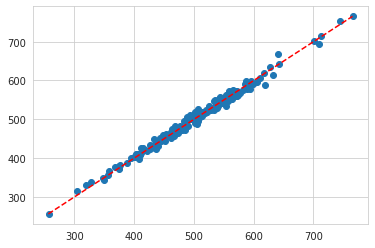

In [37]:
plt.scatter(y_test,predictions)
d_line= np.arange(df_results.min().min(), df_results.max().max())
plt.plot(d_line, d_line, color='red', linestyle='--')
plt.show()

## Evaluating the Model

Let's evaluate our model performance by calculating the $R^2$ score. Remember 1 es the best possible score.

In [40]:
from sklearn import metrics

In [42]:
print(metrics.r2_score(y_test, predictions))
print(metrics.explained_variance_score(y_test,predictions))   #explained

0.9890046246741233
0.9890771231889606


In [43]:
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 7.228148653430853
MSE: 79.81305165097487
RMSE: 8.933815066978656


## Residuals

If the histogram of the residuals is normally distributed we can be sure the model is good

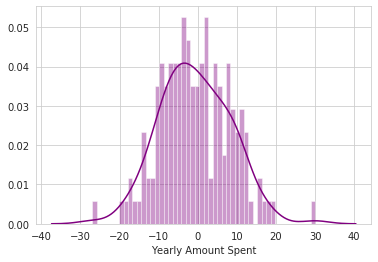

In [45]:
sns.distplot((y_test-predictions),bins=50,color='purple')

## Conclusion

The most important feature on clients to spend more money in this ecommerce is the lenght of their memberships, the company can still focus their efforts in the App as this features has a good correlation also.

In [47]:
coeff_df=pd.DataFrame(linear_model.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
